# MNIST Dataset

In [1]:
import tensorflow as tf
import numpy as np
import RBM
import matplotlib.pyplot as plt

In [2]:
binarized_dataset = False

(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

x_train = x_train / 255
x_test = x_test / 255

if binarized_dataset:
    from sklearn.preprocessing import Binarizer
    binarizer = Binarizer()
    transformer = binarizer.fit(x_train.reshape(-1,28*28))
    x_train = binarizer.transform(x_train.reshape(-1,28*28))
    x_test = binarizer.transform(x_test.reshape(-1,28*28) )

Transform `numpy.array` into `tf.data.Dataset`

In [3]:
dataset = tf.data.Dataset.from_tensor_slices(x_train.reshape(-1,28*28).astype(np.float32))
dataset = dataset.shuffle(x_train.shape[0], reshuffle_each_iteration=True)

In [7]:
rbm = RBM.RBM(
    visible_dim = 28*28,
    hidden_dim = 64
)
print(f"available training algorithms: " + ", ".join(rbm.algos))
rbm.training_algorithm = "contrastive_divergence"
rbm.build()
print(rbm)

available training algorithms: contrastive_divergence, contrastive_divergence_gibbs, persistent_contrastive_divergence, persistent_contrastive_divergence_gibbs
sampler                  : bernoulli
lr                       : 0.01
momentum                 : 0.95
ngibbs                   : -1
training_algorithm       : contrastive_divergence
visible_dims             : 784
hidden_dims              : 64
initializer              : glorot_uniform
persistent_size          : -1
persistent_update_rate   : -1


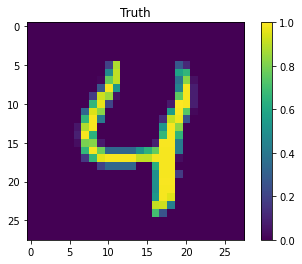

In [5]:
a = plt.imshow(x_test[4].reshape(28,28))
plt.colorbar(a)
plt.title("Truth")
plt.show()

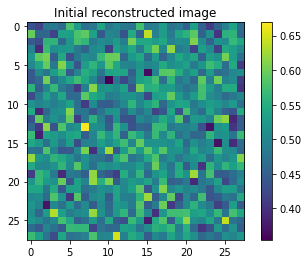

In [6]:
vis = rbm.reconstruct(tf.cast(tf.reshape(x_test[4], (1,28*28)), rbm.dtype))
a = plt.imshow(tf.reshape(vis,(28,28)).numpy())
plt.colorbar(a)
plt.title("Initial reconstructed image")
plt.show()

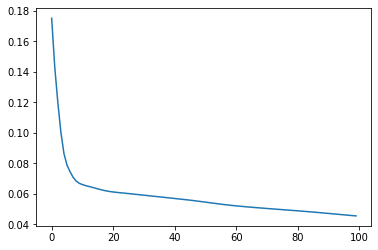

In [8]:
hist = rbm.train(training_sample = dataset, nepoch = 100, batch_size = 10)
plt.plot(hist.history["mse"])

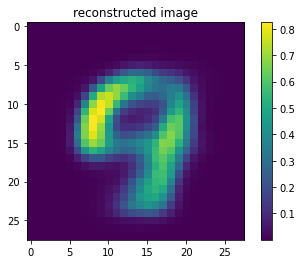

In [11]:
vis = rbm.reconstruct(tf.cast(tf.reshape(x_test[4], (1,28*28)), rbm.dtype))
a = plt.imshow(tf.reshape(vis,(28,28)).numpy())
plt.colorbar(a)
plt.title("reconstructed image")
plt.show()